In [3]:
# Exploring our data and visualization
# Train and create a linear Regression model
# Evaluate our model
# Make predictions
# Calculate RMSE
# What if we consider more/less features?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('data\home_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# We will try to predict the price of the house using price as our target
# We will consider 5 or 6 datasets
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.4+ MB


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0, 0.5, 'price of house')

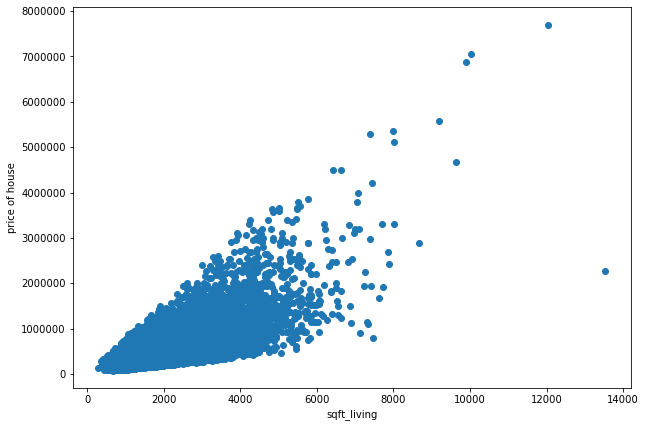

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(df.sqft_living, df.price)
plt.xlabel('sqft_living')
plt.ylabel('price of house')

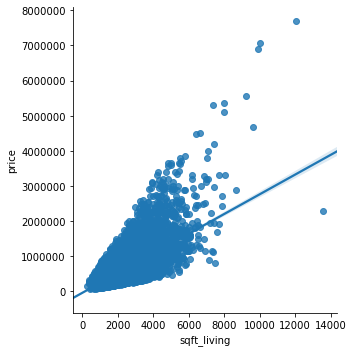

In [11]:
# To get the line regression line for our plot
sns.lmplot('sqft_living', "price", data=df)

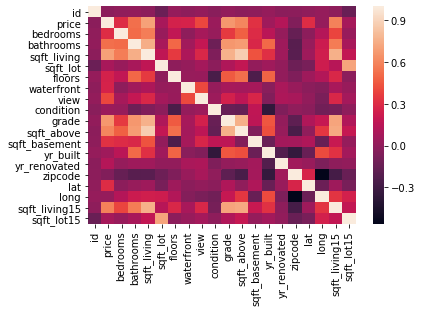

In [12]:
# To see a heatmap
sns.heatmap(df.corr())

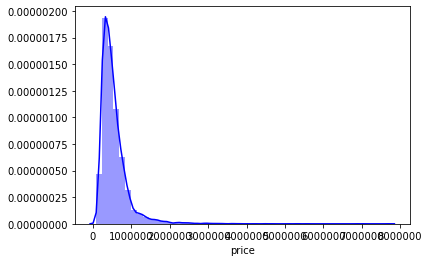

In [17]:
sns.distplot(df.price, color='blue')

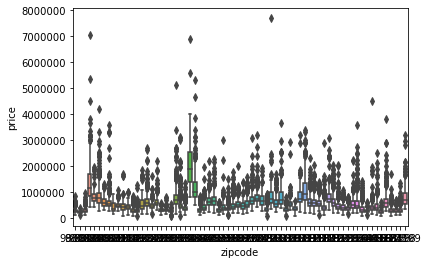

In [18]:
sns.boxplot(x='zipcode', y='price', data=df)

## Linear Regression model

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.4+ MB


In [26]:
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 
       'sqft_lot15', 'yr_built', 'condition', 'zipcode']] # dimensional array

y = df['price'] #1 dimension

In [27]:
x.shape

(21613, 10)

In [31]:
y.shape

(21613,)

In [39]:
#Split our data to train and test by importing this module
from sklearn.model_selection import train_test_split

In [40]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _isotonic
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experimental (package)
    externals (package)
    feature_extraction (p

In [41]:
# training testing by default, #75% is used to train, 25% for testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)

In [46]:
# 70% of the data are used to train
print(x_train.shape, y_train.shape)

(15129, 10) (15129,)


In [47]:
print(x_test.shape, y_test.shape)

(6484, 10) (6484,)


In [49]:
# import our model from sklearn
from sklearn.linear_model import LinearRegression

In [51]:
# To create our model, we create an instance of linear regression class
model = LinearRegression()

In [52]:
# To train our model
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# We predict with our model
prediction = model.predict(x_test)

In [65]:
ho = df[df.id== 6414100192]
ho = df[df.id==6414100192]
ho

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639


In [67]:
prediction[1]

623668.1927766339

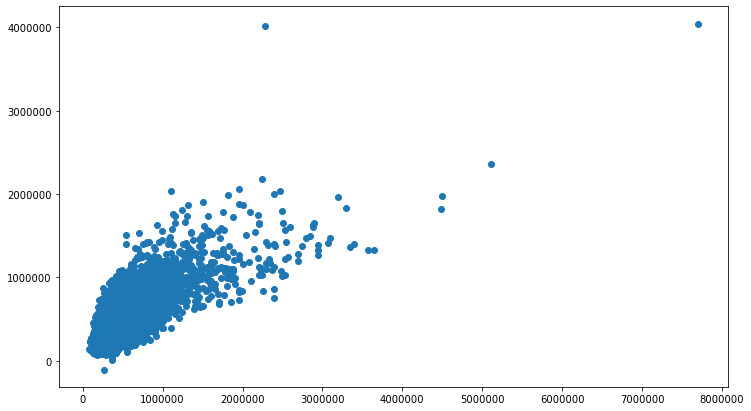

In [70]:
# Plot a scatter plot of the predition to the scatter plot
plt.figure(figsize=(12,7))
plt.scatter(y_test, prediction)


In [71]:
# To find the coefficient values of our model
model.coef_

array([-6.69454220e+04,  6.58555265e+04,  2.93072302e+02, -8.44637194e-02,
        5.02225011e+04,  1.65131634e+01, -5.04131250e-01, -3.15220951e+03,
        2.14309813e+04,  7.40366649e+01])

In [73]:
# map our coefficients to columns
dfc = pd.DataFrame(model.coef_, x.columns, columns=['coeff value'])

In [75]:
# This shows the rate of relationship of features on the price
dfc

,coeff value
bedrooms,-66945.422024
bathrooms,65855.526519
sqft_living,293.072302
sqft_lot,-0.084464
floors,50222.501089
sqft_above,16.513163
sqft_lot15,-0.504131
yr_built,-3152.209512
condition,21430.981313
zipcode,74.036665


In [76]:
# To see the intercept on the y axis
model.intercept_

-1201560.4461044972

## RMSE

In [77]:
# To evaluate our model we use the Root Mean Square
# It subtracts between the actual value and the predicted value, and the the sqrt of it
# The lower the root mean square error, the better our model predicts
# We use the mean square error matrix and the use it to find the RMS

In [85]:
from sklearn import metrics

mean_sq_er = metrics.mean_squared_error(y_test, prediction)

In [87]:
Root_mean_sq = np.sqrt(mean_sq_er)
Root_mean_sq

245396.43524801306

In [88]:
# Build another model and compare with the old one
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']] # dimensional array

y = df['price'] #1 dimension

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [91]:
model2 = LinearRegression()

In [92]:
model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
predict2 = model2.predict(x_test)

In [98]:
predict2[1]

718281.2079602862

In [94]:
# RMSE

In [96]:
mse = metrics.mean_squared_error(y_test, predict2)
rmse = np.sqrt(mse)
rmse

248257.0852332562

In [97]:
Root_mean_sq

245396.43524801306